In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("insurance_data.csv")
df.shape

(1340, 11)

In [3]:
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [29]:
import seaborn as sns

<Axes: xlabel='bmi', ylabel='claim'>

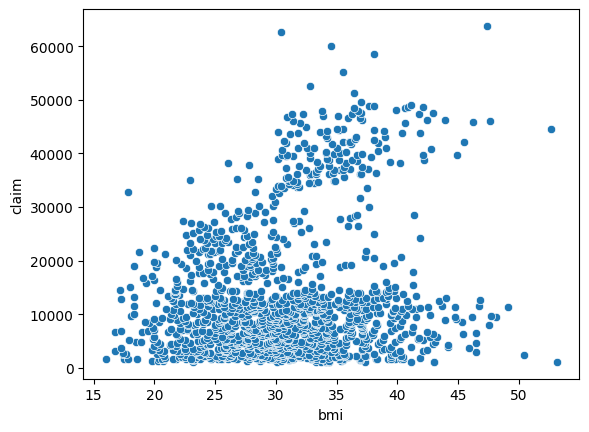

In [30]:
sns.scatterplot(data = df , x = 'bmi' , y = 'claim')

In [17]:
x = df['bmi'].values
y = df['claim'].values

# train test split

In [7]:
from sklearn.model_selection import train_test_split

In [18]:
x_train , x_test , y_train, y_test = train_test_split(x, y , test_size = 0.2, random_state = 2)

In [21]:
y_train

array([21880.82,  3490.55,  4687.8 , ...,  6799.46,  7261.74, 33732.69])

In [19]:
print(x_train.shape, y_train.shape)

(1072,) (1072,)


# model code

In [11]:
from sklearn.linear_model import LinearRegression

In [15]:
# create an object for this LinearRegression class
slr = LinearRegression()

In [22]:
# train the model ( fit() )
slr.fit(x_train.reshape(-1, 1) , y_train)

LinearRegression()

In [23]:
# predict values for given inputs ( predict(x_test) )
slr.predict(x_test.reshape(-1,1))

array([13047.04453624, 12233.8579545 , 12477.81392902,  9428.36424748,
       15608.58226874, 14022.86843434, 14022.86843434, 14714.07702882,
       11258.03405641, 12599.79191628, 11949.24265089,  9550.34223475,
       15933.85690143, 15486.60428147,  9712.97955109, 15080.0109906 ,
        8899.79296935, 15364.62629421, 10607.48479101, 10078.91351288,
       18332.75731758, 14551.43971247, 15730.560256  , 12884.40721989,
       14266.82440886, 11176.71539823, 14958.03300334, 10404.18814558,
       13616.27514346, 13860.23111799, 15689.90092691, 14307.48373795,
       19186.60322841, 11258.03405641,  9753.63888018, 10973.4187528 ,
       15323.96696513, 10363.52881649, 18007.48268488, 13778.91245981,
       10241.55082923, 10241.55082923, 12355.83594176, 10851.44076554,
       12884.40721989, 16503.08750865, 13697.59380164,  9753.63888018,
       11867.92399271, 15730.560256  , 14348.14306703,  7761.33175491,
       11542.64936002, 15323.96696513, 14185.50575068, 11623.96801819,
      

In [24]:
y_test

array([32548.34,  5484.47, 19719.69,  7222.79, 42969.85, 34472.84,
        4738.27,  1261.86,  4239.89,  7323.73, 24603.05, 14449.85,
        9634.54, 13887.2 ,  2585.85, 27724.29, 12032.33, 14313.85,
       24869.84, 12094.48,  5846.92, 11356.66, 31620.  ,  5478.04,
       19442.35, 12629.17, 41034.22,  4719.74, 11187.66,  8062.76,
       47896.79,  8334.59,  6356.27,  4133.64, 12029.29, 11837.16,
       26392.26, 10959.33, 11326.71, 13555.  ,  8252.28,  6686.43,
       11253.42, 21659.93,  7337.75, 12981.35, 37701.88,  3176.29,
        6496.89, 36149.48, 34617.84,  3732.63,  7742.11, 11163.57,
       13919.82,  1665.  ,  4837.58,  2464.62, 20149.32,  8606.22,
       10085.85, 28868.66,  2457.21,  8516.83,  4889.04,  3943.6 ,
        7281.51, 18955.22,  6753.04, 39597.41, 20745.99,  6455.86,
        8569.86,  7935.29,  3578.  ,  4564.19, 11264.54, 45710.21,
        8310.84, 11272.33,  5383.54, 11741.73,  2104.11, 20630.28,
        8932.08,  4504.66, 37079.37, 10965.45, 22331.57, 14358

In [32]:
# slop m
slr.coef_

array([406.59329087])

In [33]:
# intercept b
slr.intercept_

727.2678228247223

y = m x + b

# Mesuring Accuracy - R2 Score

In [25]:
from sklearn.metrics import r2_score

In [26]:
?r2_score

Signature:
r2_score(
    y_true,
    y_pred,
    *,
    sample_weight=None,
    multioutput='uniform_average',
    force_finite=True,
)
Docstring:
:math:`R^2` (coefficient of determination) regression score function.

Best possible score is 1.0 and it can be negative (because the
model can be arbitrarily worse). In the general case when the true y is
non-constant, a constant model that always predicts the average y
disregarding the input features would get a :math:`R^2` score of 0.0.

In the particular case when ``y_true`` is constant, the :math:`R^2` score
is not finite: it is either ``NaN`` (perfect predictions) or ``-Inf``
(imperfect predictions). To prevent such non-finite numbers to pollute
higher-level experiments such as a grid search cross-validation, by default
these cases are replaced with 1.0 (perfect predictions) or 0.0 (imperfect
predictions) respectively. You can set ``force_finite`` to ``False`` to
prevent this fix from happening.

Note: when the prediction residuals hav

In [28]:
y_pred = slr.predict(x_test.reshape(-1,1))
r2_score(y_test, y_pred) * 100

2.593356397344704

# how can i build a model from scratch

In [ ]:
class LinearRegression:
  def __init__(self):
    self.b = None
    self.m = None

  def fit(self , x_train , y_train):
    num = 0
    deno = 0

    for i in range(x_train.shape[0]):
      num += (x_train[i] - x_train.mean() ) * (y_train.iloc[i] - y_train.mean() )
      deno  += (x_train[i] - x_train.mean() ) ** 2

    self.m = num/deno
    self.b = y_train.mean() - self.m * x_train.mean()

  def predict (self,x_test):
    return (self.m * x_test + self.b)